<a href="https://colab.research.google.com/github/koreacamel/code_project/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제조 공정 데이터 분석 

### 도메인 선택이유
 - 중소기업 제조공정에서 일할때 작업자의 주관적인 판단이 중요하다는 것을 알았습니다. 주관적인 판단은 제품 생산에 중요한 역할을 하지만 미숙련된 작업자는 판단하기 어려운 상황들이 많습니다. 주관적인 판단은 작업자 개인의 노하우이고 자신만에 기술 입니다. 고로 남들에게 쉽게 알려주지 않아 새로운 작업자가 생기기 어렵습니다. 이러한 그들만의 문화가 악순환되어 사라져가는 노하우들이 많아지고 있습니다. 그들의 암묵적인 지식을 머신러닝으로 형식화하여 중소 제조기업의 도움이 되고 싶은 마음으로 선택하였습니다.  

### 주제 선택이유
 - 먼저 제조공정에서 작업자들의 주관적이 판단을 형식화 할 수 있는 데이터 셋을 찾았고 그 중에서 지도학습을 사용할 수 있는 데이터를 선택하였습니다. 



<img src = "http://resourcewebsite.singoo.cc/14967320876387150/ar/image/5be94684d9d38.jpg" height = 300 width = 500>  
 
## 1. `HACCP`의 `CCP`( Critical Control Point) 한계기준 존재 
 - 제품품질 및 식품안전 보장 측면에서 살균공정은 매우 중요하나,
`HACCP`의 `CCP`( Critical Control Point) 한계기준은 식품안전 측면의 기준이기 때문에 반드시 제품품질을 보장한다고는 할 수 없다. 따라서 CCP 한계기준은 항상 최대치, 최소치 또는 범위로 지정되어 있으며, 제조현장에서 생산제품 및 설비에 따라 기준 내 공정/설비 운영값을 설정하도록 한다.

## 2. 온도 조정 시차에 따른 `온도변화는 불가피`, 이로인한 품질을 현장에서 확인하지 못한다.
- 살균공정은 일반적으로 살균온도와 살균시간을 지표로 CCP 잘 지켰는지 판단한다. 제조현장에서는 기존 자료, 시험결과 등을 바탕으로 제품별로 CCP 기준을 준수하면서
동시에 목표 품질을 위한 공정기준값을 설정하여 공정을 수행하는데, 가열방식의 특
성상 살균공정 동안 내용물의 온도는 일정하게 유지되지 않고 계속해서 변동한다. 살균기의 내부 센서가 이를 감지하여 설정온도가 유지되도록 이에 맞춰 가열온도를 변
경하지만, 온도가 조정되는 동안의 시차가 있기 때문에 어느 정도의 온도변화는 불가
피하며, 이에 따른 품질 영향은 현장에서 확인되지 못하고 있다.

## 3. 노후화된 설비는 적정온도를 유지하기 어렵다. `작업자의 경험과 직감에 의존` 
- 살균기가 온도변화를 감지하는 시점에 온도설정을 변경하여도 내용물 전체에 영향을
미치는 시차는 항상 있으며, 특히 노후화된 설비는 센서 또는 가열기능이 불안정하기
때문에 설비 자체적으로 적정 온도가 항상 유지되길 기대하는 것은 어렵다. 이 때문에
대부분은 작업자가 현장에서 온도 모니터링을 하는데, 이마저도 경험과 직감에 의존
한 주관적 판단으로 설정온도를 조정하기 때문에 일관적이지 않다.



## 분석 목표 : 살균공정 실시간으로 품질을 예측하고 공정제어
- 살균공정의 CCP 이행과 제품품질을 둘 다 확보하기 위해서는 지금과 같이 노후화된
살균기의 자체 기능에만 의존하거나 작업자의 주관적 판단에 의존한 대처 방법이 아
닌 데이터에 기반한 품질예측 방법이 필요하다. 살균여부의 주요 지표인 살균온도와
제품 불량 데이터의 머신학습을 통하여 살균공정 중 실시간으로 품질을 예측하고 이
를 공정제어에 이용할 수 있다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('pasteurizer.csv', sep= ',')
df.head(5)

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210794 entries, 0 to 210793
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STD_DT              210794 non-null  object 
 1   MIXA_PASTEUR_STATE  11135 non-null   float64
 2   MIXB_PASTEUR_STATE  10255 non-null   float64
 3   MIXA_PASTEUR_TEMP   201423 non-null  float64
 4   MIXB_PASTEUR_TEMP   198802 non-null  float64
 5   INSP                210794 non-null  object 
dtypes: float64(4), object(2)
memory usage: 9.6+ MB


In [ ]:
df.isna().sum()

STD_DT                     0
MIXA_PASTEUR_STATE    199659
MIXB_PASTEUR_STATE    200539
MIXA_PASTEUR_TEMP       9371
MIXB_PASTEUR_TEMP      11992
INSP                       0
dtype: int64

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STD_DT,210794,206068,2020-03-19 21:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIXA_PASTEUR_STATE,11135.0,NaN,NaN,NaN,50326.930489,528690.138745,0.0,0.0,1.0,1.0,5603841.0
MIXB_PASTEUR_STATE,10255.0,NaN,NaN,NaN,633.20039,6408.270847,0.0,0.0,1.0,1.0,65536.0
MIXA_PASTEUR_TEMP,201423.0,NaN,NaN,NaN,566.867528,69.061703,0.0,543.0,570.0,596.0,772.0
MIXB_PASTEUR_TEMP,198802.0,NaN,NaN,NaN,18625.675204,811173.130092,0.0,542.0,569.0,595.0,42795008.0
INSP,210794,2,OK,133010,NaN,NaN,NaN,NaN,NaN,NaN,NaN


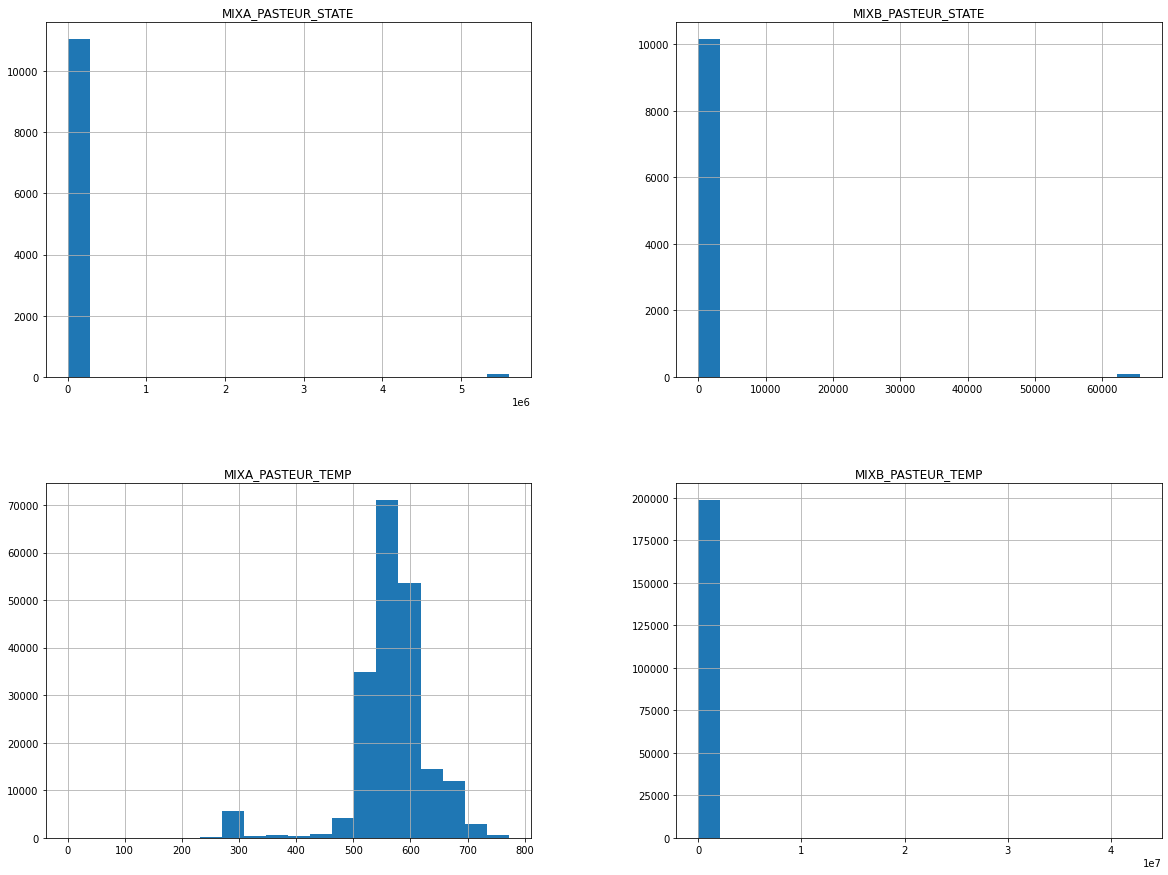

In [ ]:
df.hist(bins = 20 , figsize = (20, 15));

# 전처리  

### 1. 결측치를 대체하기 위한 데이터가 부족하여 결측치를 제거 해준다. 

In [ ]:
df_after = df.dropna()
df_after.isna().sum()

STD_DT                0
MIXA_PASTEUR_STATE    0
MIXB_PASTEUR_STATE    0
MIXA_PASTEUR_TEMP     0
MIXB_PASTEUR_TEMP     0
INSP                  0
dtype: int64

### 2. 작동 상태를 나타내는 컬럼은 0, 1 로 이루어 져야 하므로 2 이하로 데이터를 제한해 준다. 

In [ ]:
df_after = df_after[(df_after['MIXA_PASTEUR_STATE'] < 2) & (df_after['MIXB_PASTEUR_STATE'] < 2)]
df_after = df_after.reset_index(drop=True)

In [ ]:
df_after.shape

(9383, 6)

### 3. 온도를 나타내는 컬럼이 nnn으로 기록되어 있는 것을 nn.n 으로 변환해준다.

In [ ]:
# 온도가 nn.n 이 nnn으로 기록되어 있는 것을 nn.n 으로 변환해준다. 
df_after['MIXA_PASTEUR_TEMP'], df_after['MIXB_PASTEUR_TEMP'] = df_after['MIXA_PASTEUR_TEMP'] / 10, df_after['MIXB_PASTEUR_TEMP'] /10
df_after.head(5)

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,55.1,52.4,OK
1,2020-03-04 6:30,1.0,1.0,58.4,53.6,OK
2,2020-03-04 7:00,1.0,1.0,58.4,53.6,OK
3,2020-03-04 7:30,1.0,1.0,58.5,53.6,OK
4,2020-03-04 8:00,1.0,1.0,58.5,53.6,OK


### 4. 분석에 용의하게 INSP 불량여부컬럼을 OK : 1, NG : 0 으로 대체 해준다.

In [ ]:
df_after['INSP'] = np.where(df_after['INSP'] == 'OK', 1, 0)
df_after

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,55.1,52.4,1
1,2020-03-04 6:30,1.0,1.0,58.4,53.6,1
2,2020-03-04 7:00,1.0,1.0,58.4,53.6,1
3,2020-03-04 7:30,1.0,1.0,58.5,53.6,1
4,2020-03-04 8:00,1.0,1.0,58.5,53.6,1
...,...,...,...,...,...,...
9378,2020-09-15 15:00,1.0,1.0,56.0,58.0,1
9379,2020-09-15 15:30,1.0,1.0,58.8,55.5,1
9380,2020-09-15 16:00,1.0,1.0,58.8,55.0,1
9381,2020-09-15 16:30,1.0,1.0,59.5,55.5,1


In [ ]:
df_after.describe().T

,count,mean,std,min,25%,50%,75%,max
MIXA_PASTEUR_STATE,9383.0,0.496003,0.500011,0.0,0.0,0.0,1.0,1.0
MIXB_PASTEUR_STATE,9383.0,0.496003,0.500011,0.0,0.0,0.0,1.0,1.0
MIXA_PASTEUR_TEMP,9383.0,47.423745,12.880190,0.0,29.8,53.8,57.1,77.2
MIXB_PASTEUR_TEMP,9383.0,47.304540,12.443548,0.0,31.2,53.6,56.9,76.5
INSP,9383.0,0.849195,0.357877,0.0,1.0,1.0,1.0,1.0


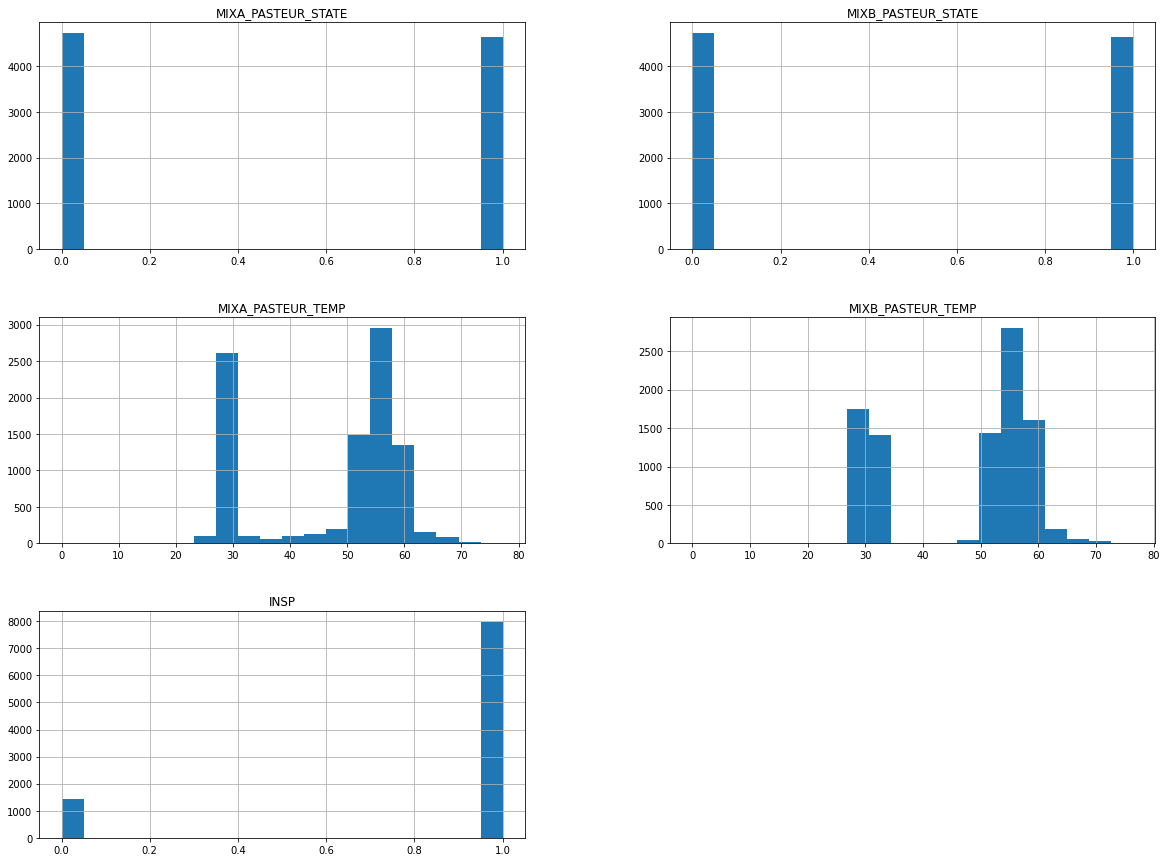

In [ ]:
df_after.hist(bins = 20 , figsize = (20, 15));

# 데이터 특성파악

### 1. 특성간 상관관계를 분석한다.


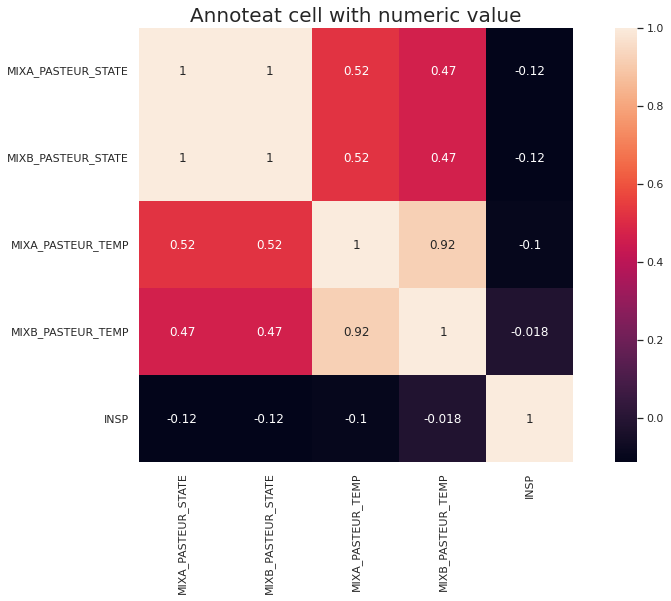

In [ ]:
df_after_corr = df_after.corr()
sns.set(font_scale= 0.5)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_after_corr, annot=True, square = True)

plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

- 검정색에서 연주황색으로 색상이 변할수록 상관관계가 높은 것을 의미한다. 4개의 특성 중 MIXA_PASTEUR_TEMP와 MIXB_PASTEUR_TEMP 특성이 상관계수가 0.92로 높은것을 볼 수 있다. 

### 2. 산점도 메트릭스 확인 

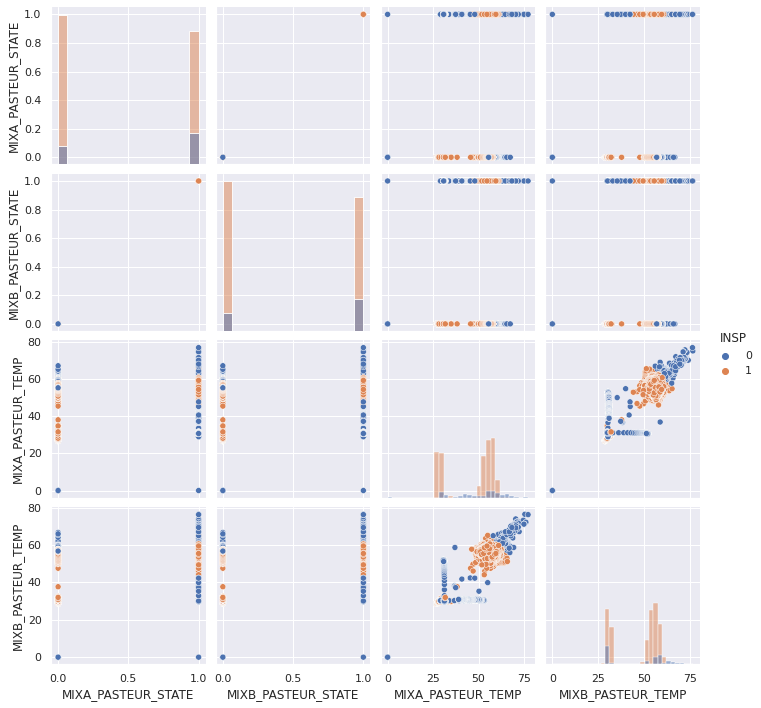

In [ ]:
sns.pairplot(df_after, diag_kind='hist',hue="INSP");

- 양품인 경우 주황색, 불량인경우 파란색으로 나타난다. MIXA_PASTEUR_TEMP와 MIXB_PASTEUR_TEMP의 분포는 양품인 경우 그래프가운데 위치하고 있고, 불량인 경우는 우측 상단과 ㄴ자 모형으로 패턴을 이루고있는 것을 확인할 수 있다. 따라서 `비교적 양품과 불량에 대한 구분이 특정 패턴을이루고 있는 것을 짐작해 볼 수 있다.`

# 학습,검증,평가 데이터 분리

In [ ]:
features = ['MIXA_PASTEUR_STATE',	'MIXB_PASTEUR_STATE',	'MIXA_PASTEUR_TEMP',	'MIXB_PASTEUR_TEMP']
target = 'INSP' 

X = df_after[features]
y = df_after[target]
print(X.shape, y.shape)

(9383, 4) (9383,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test =train_test_split(X, y, train_size = 0.7)
X_train, X_val, y_train ,y_val = train_test_split(X_train,y_train,  train_size=0.7, test_size=0.3)

X_train.shape, X_val.shape, X_test.shape

((4597, 4), (1971, 4), (2815, 4))

In [ ]:
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = [majority_class]*len(y)

print("최빈 클래스: ", majority_class)
print("정확도: ", accuracy_score(y, y_pred))

최빈 클래스:  1
정확도:  0.8491953532985186


## 기준모델 : 최빈값 
- 기준모델의 정확도는 약 0.85이다. 즉, 새로운 값을 고려하지 않고 무조건 양품이라고 예측해도 약 85%는 맞힌다는 것이다. 따라서 앞으로 만들 모델은 정확도가 약 0.85보다는 높아야 학습이 잘 되었고 의미가 있는 모델이라고 말 할 수 있다.

# 데이터 분석방법 : 의사결정나무
- 연속형과 범주형 데이터를 모두 취급 가능하고, 분류규칙이 명확하여 해석이 용이하여 작업자들이 직관적으로 알아보기 쉽게 하기 위해서 선택하였다. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    DecisionTreeClassifier()
)

pipe.fit(X_train, y_train)

print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  1.0
검증 정확도:  0.9954337899543378


In [ ]:
import graphviz
from sklearn.tree import export_graphviz

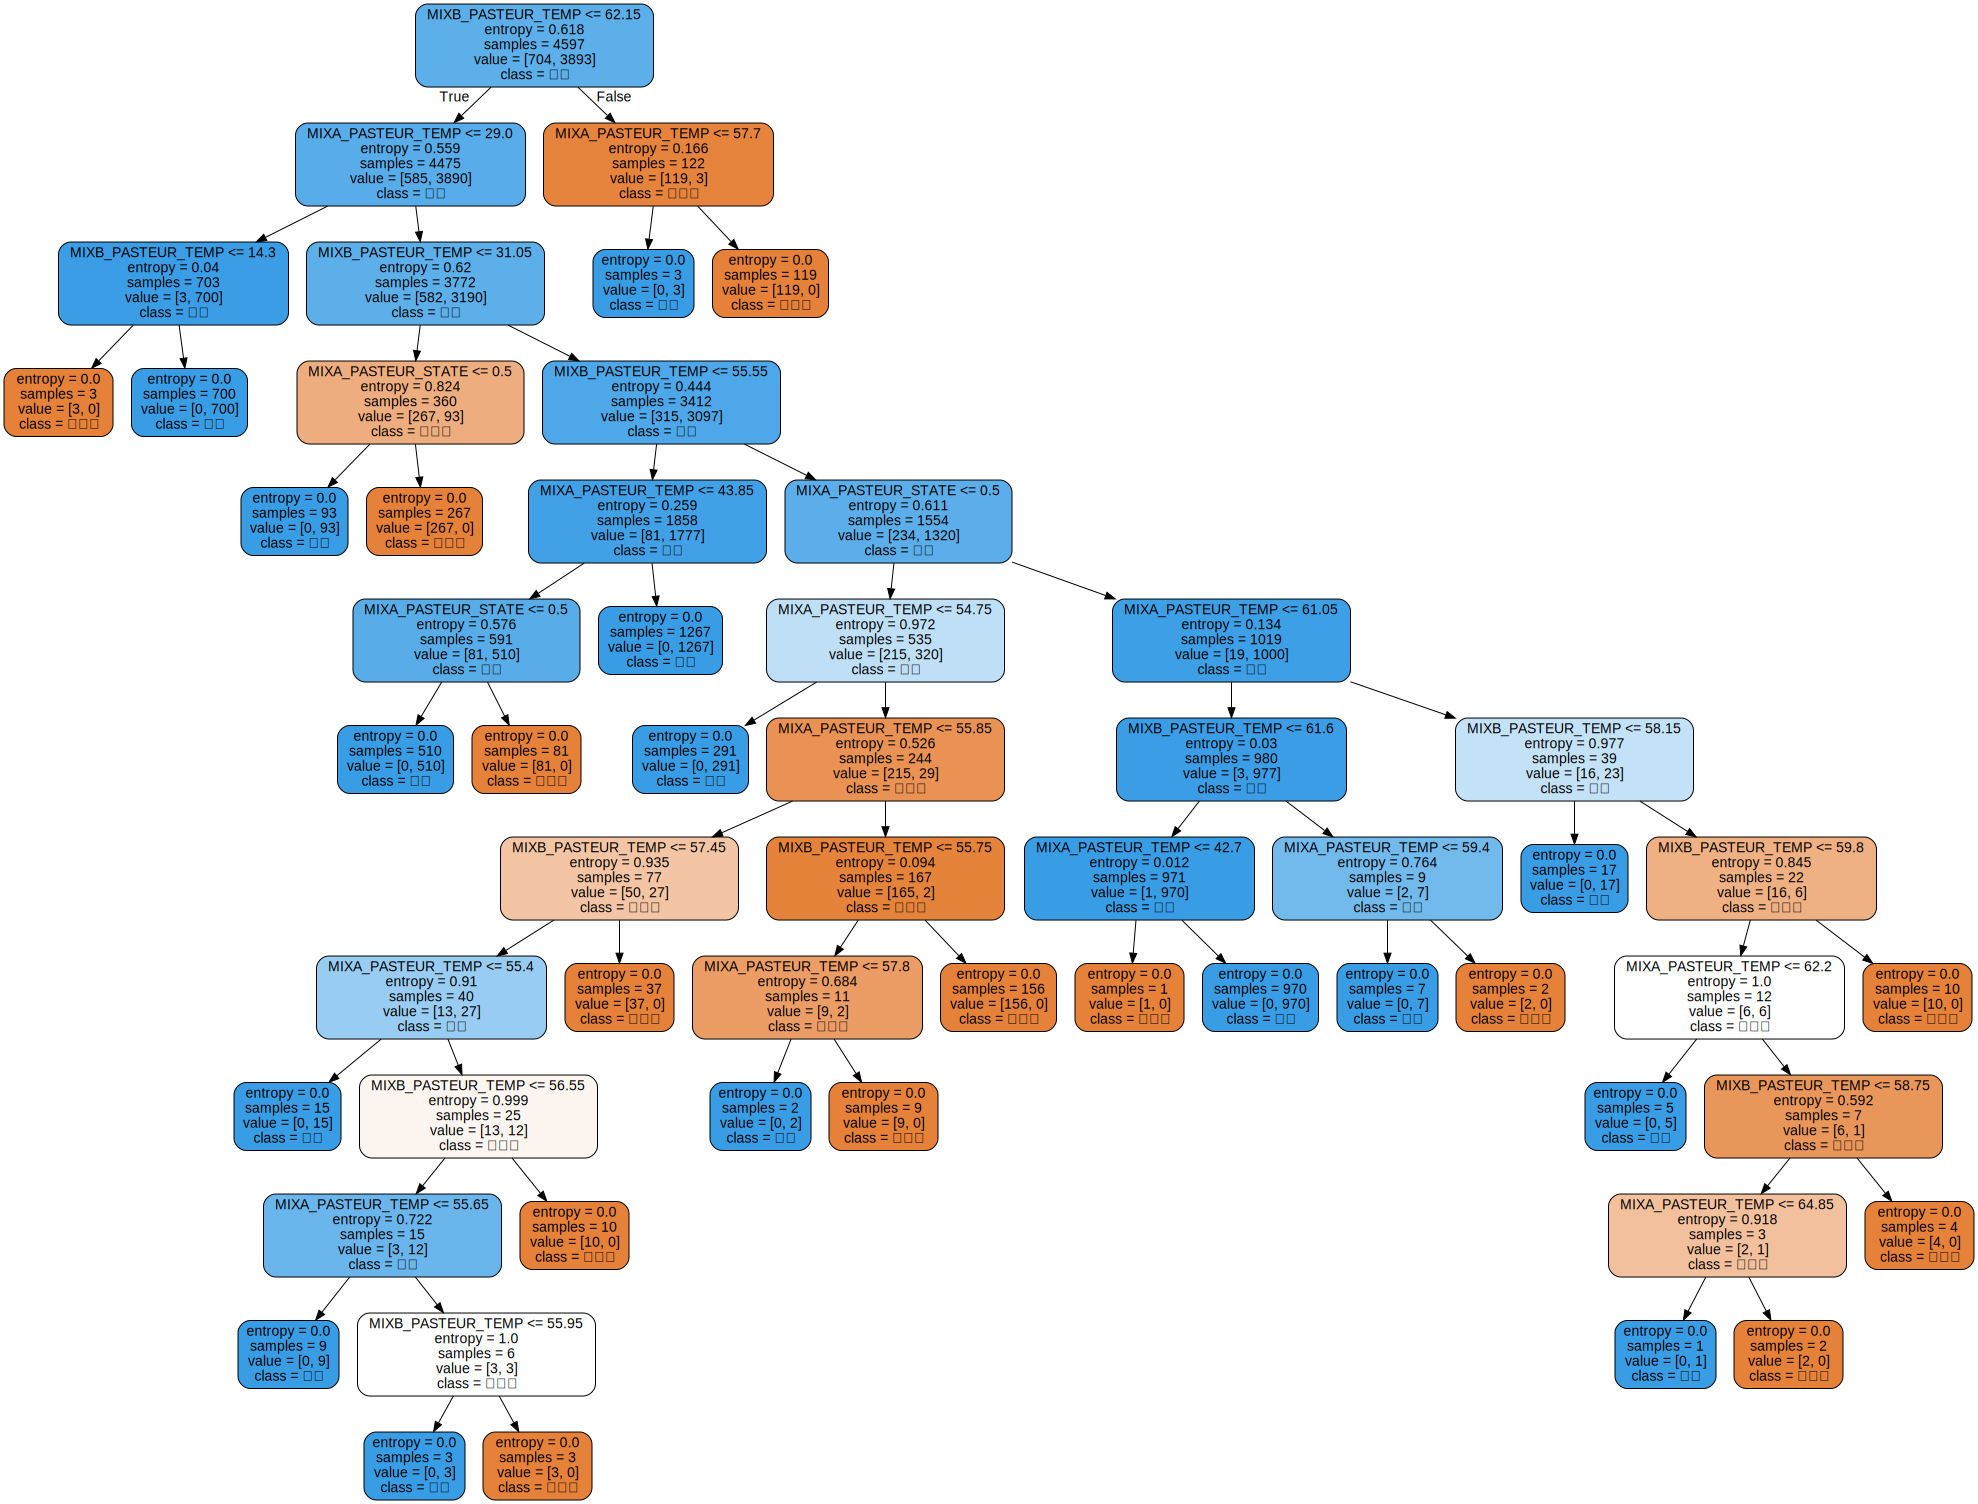

In [ ]:
model_dt = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(model_dt 
                          , feature_names=features
                          , class_names= np.array(["불량품","양품"])
                          , filled=True
                          , rounded=True)

display(graphviz.Source(dot_data))

# 하이퍼 파마리터 튜닝
- 이 데이터셋의 경우 데이터가 간단하여 과적합이 되지 않았지만 하이퍼 파라미터 튜닝을 하여 더 좋은 결과를 도출 해보고자 한다.  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import randint, uniform

pipe = make_pipeline(
    DecisionTreeClassifier( random_state=2)
)

dists = { 
    'decisiontreeclassifier__max_leaf_nodes': randint(1, 50),              
    'decisiontreeclassifier__max_depth': randint(1, 11),             
    'decisiontreeclassifier__criterion': ['entropy','gini']
}   


clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=5, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/s

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('F1: ', clf.best_score_)

최적 하이퍼파라미터:  {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 49}
F1:  0.9985868595323459


In [ ]:
pipe_model = make_pipeline(
    DecisionTreeClassifier(max_depth=10, max_leaf_nodes=24, criterion = 'entropy', random_state=2)
)

In [ ]:
pipe_model.fit(X_train, y_train)
print('훈련 정확도', pipe_model.score(X_train, y_train))
print('검증 정확도', pipe_model.score(X_val, y_val))
print('테스트 정확도', pipe_model.score(X_test, y_test))

훈련 정확도 0.998042201435719
검증 정확도 0.9944190766108574
테스트 정확도 0.9925399644760213


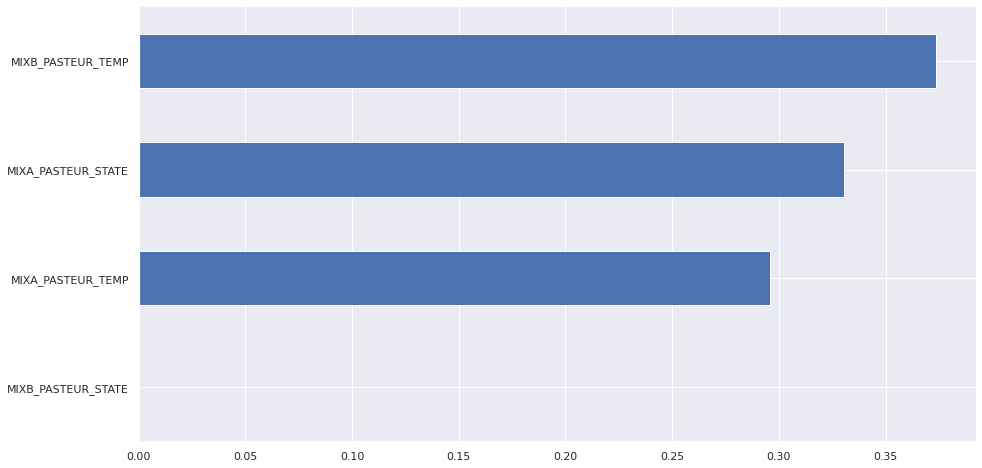

In [ ]:
model_dt = pipe_model.named_steps['decisiontreeclassifier']
importances = pd.Series(model_dt.feature_importances_, features)
plt.figure()
importances.sort_values().plot.barh();

In [ ]:
from sklearn.metrics import classification_report
y_test_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       437
           1       1.00      1.00      1.00      2378

    accuracy                           0.99      2815
   macro avg       0.99      0.99      0.99      2815
weighted avg       0.99      0.99      0.99      2815



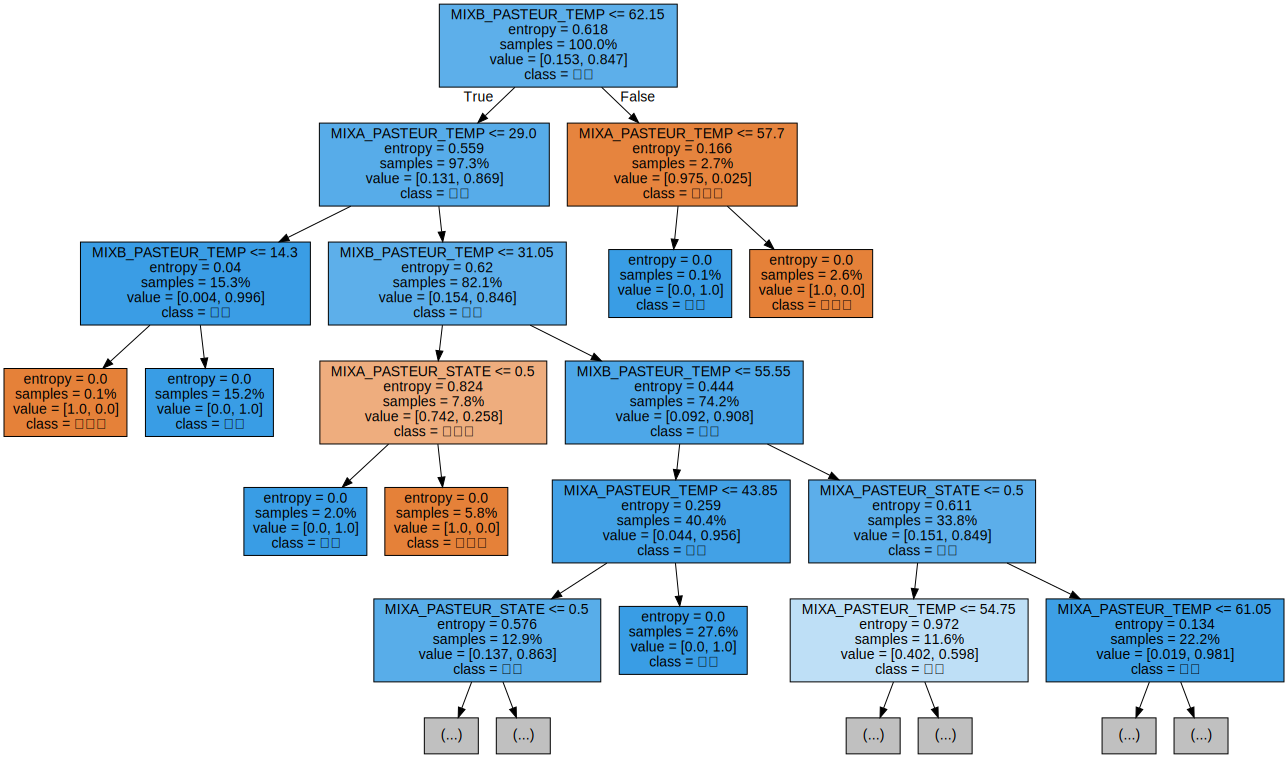

In [35]:
model_dt = pipe_model.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(model_dt 
                          , max_depth = 5
                          , feature_names=features
                          , class_names= np.array(["불량품","양품"])
                          , filled=True
                          , proportion=True)

display(graphviz.Source(dot_data))

시각화된 그래프를 살펴보면 양품로 분류된 기준이 무엇인지 확인할 수
있다. 따라서 양품으로 분류되는 가지들을 따라가면 양품의 규칙을 확인할 수 있
다. 예를 들어, 루트 노드에서 MIXB_PASTEUR_TEMP가 62.15보다 작은 경우 양
품으로 분류하였고, 초과하는 경우는 불량으로 분류하였음을 알 수 있다. 그다음,
MIXB_PASTEUR_TEMP가 62.15를 초과하는 경우 중에서 MIXA_PASTEUR_TEMP가 57.2 이하인 경우는 양품으로 분류하였고, 초과하는 경우는 불량으로 분
류하였다.

결과를 다시 정리하면 다음과 같다.



> 1) MIXB_PASTEUR_TEMP가 62.15를 초과하고, MIXA_PASTEUR_TEMP가 57.7 이하
인 경우, 양품으로 분류  
2) MIXB_PASTEUR_TEMP가 62.15를 초과하고, MIXA_PASTEUR_TEMP가 57.7 초과
인 경우, 불량으로 분류  
3) MIXB_PASTEUR_TEMP가 62.15를 이하인 경우, 양품으로 분류하나 추가 규칙에 의해
양품여부가 달라질 수도 있다.

